# Lecture 17: Quasi-Newton methods

> Given a continuous function $f(x)$, the problem is to find a point $x^*$ such that $f(x^*) = 0$. That is, $x^*$ is a solution of the equation $f(x) = 0$ and is called a **root of $f(x)$**.

How to do Newton's method but without the derivative!

## Recall Newton's method:

$$x^{(i+1)} = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$$

In [1]:
def newton(f, df, x0, tol=1.0e-10):
    x = x0
        
    while abs(f(x)) > tol:
        x = x - f(x) / df(x)
        
    return x

Newton's method requires **function** and **it's derivative**.

This may not be possible since:

- $f(x)$ may be a "black box"
- the formula for $f(x)$ may be known but difficult to differentiate
- the derivative maybe *very* expensive to evaluate

# Approximating f'(x)

Let's approximate $f'(x)$ like we approximated $y'(t)$ when solving a differential equation!

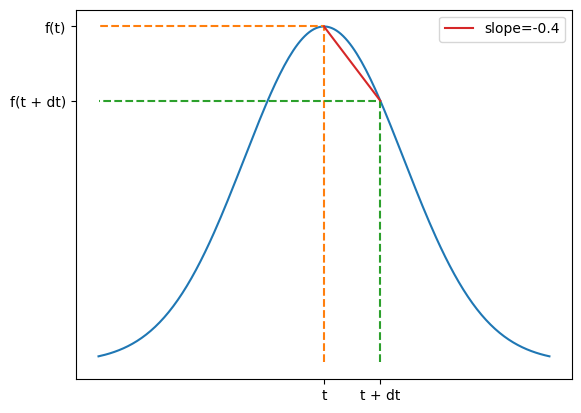

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
	return np.exp(-x**2)

def plot(dt=1.0):
	t = np.linspace(-2, 2, 200)
	plt.plot(t, f(t))

	plt.plot([0, 0, -2], [0, f(0), f(0)], '--')
	plt.plot([dt, dt, -2], [0, f(dt), f(dt)], '--')

	slope = (f(dt)- f(0)) / dt
	plt.plot([0, dt], [f(0), f(dt)], label=f"{slope=:.1f}")

	plt.xticks([0, dt], ['t', 't + dt'])
	plt.yticks([f(0), f(dt)], ['f(t)', 'f(t + dt)'])

	plt.legend()
	plt.show()

plot(0.5)

## Modified Newton's method

-   Recall that $f'(x) = \lim_{\mathrm{d}x \to 0} \frac{f(x + \mathrm{d}x) - f(x)}{\mathrm{d}x}$.

-   Hence we can choose a small value for $\mathrm{d}x$ (how small?) and approximate:

    $$
    f'(x) \approx \frac{f(x + \mathrm{d}x) - f(x)}{\mathrm{d}x}.
    $$

-   This modified-Newton method then becomes

    $$
    x^{(i+1)} = x^{(i)} - \frac{\mathrm{d}x \times f(x^{(i)})}{f(x^{(i)} + \mathrm{d}x) - f(x^{(i)})}.
    $$

In [3]:
def modified_newton(f, x0, dx, tol=1.0e-10):
    x = x0
        
    while abs(f(x)) > tol:
        df = (f(x + dx) - f(x)) / dx # two extra evaluations of f
                                     # per iteration
        x = x - f(x) / df
        
    return x

In [4]:
def modified_newton(f, x0, dx, tol=1.0e-10):
    x = x0
    fx = f(x)
        
    while abs(fx) > tol:
        df = (f(x + dx) - fx) / dx # one extra evaluations of f
                                   # per iteration
        x = x - fx / df
        fx = f(x) # one original evaluation of f per iteration
        
    return x

## How to choose $\mathrm{d}x$?

**Smaller** - more accurate approximation

**Large** - too small and we will have rounding problems (subtracting two similar numbers)

## Example

-   When $f(x) = x^3$ then $f'(x) = 3 x^2$.

-   Hence, at $x_0 = 1$, $f(x_0) = 1$ and $f'(x_0) = 3$.

-   Consider what happens when we approximate this with python, using finite values for $\mathrm{d}x$.

In [5]:
def f(x):
    return x**3
def df(x):
    return 3*x**2

x = 1

headers = ["dx", "approx", "abs error", "rel error"]
data = []

for e in range(4, 18, 2):
    dx = 10 ** -e
    approx = (f(x + dx) - f(x)) / dx
    exact = df(x)
    abs_error = abs(exact - approx)
    rel_error = abs(exact - approx) / exact

    new_data = [dx, approx, abs_error, rel_error]
    data.append(new_data)

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.format(formatter={"dx": "{:e}", "approx": "{:f}", "abs error": "{:e}", "rel error": "{:e}"}).hide_index().set_caption("Simple approximation of a derivative using floating point arithmetic")

dx,approx,abs error,rel error
1.000000e-04,3.000300,3.000100e-04,1.000033e-04
1.000000e-06,3.000003,2.999798e-06,9.999326e-07
1.000000e-08,3.000000,3.972048e-09,1.324016e-09
1.000000e-10,3.000000,2.482211e-07,8.274037e-08
1.000000e-12,3.000267,2.667017e-04,8.890058e-05
1.000000e-14,2.997602,2.397834e-03,7.992778e-04
1.000000e-16,0.000000,3.000000e+00,1.000000e+00


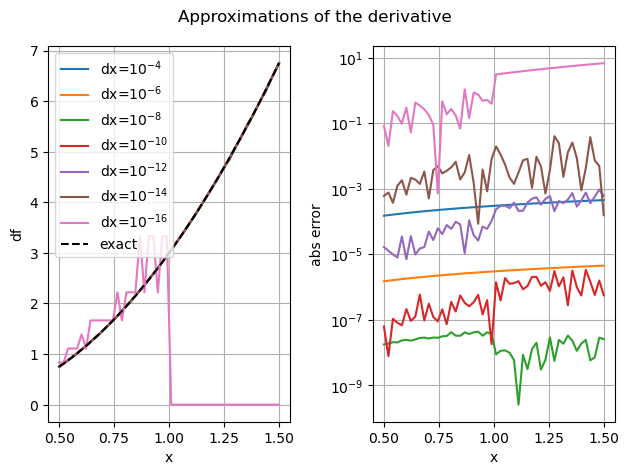

In [6]:
def f(x):
    return x**3
def df(x):
    return 3*x**2

xx = np.linspace(0.5, 1.5)
exact = df(xx)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Approximations of the derivative")

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for e in range(4, 18, 2):
    dx = 10 ** -e
    approx = (f(xx + dx) - f(xx)) / dx
    
    ax1.plot(xx, approx, label="dx=$10^{" + str(-e) + "}$")
    ax2.semilogy(xx, abs(approx-exact))
    
ax1.plot(xx, exact, 'k--', label='exact')

ax1.set_xlabel("x")
ax1.set_ylabel("df")
ax1.grid()
ax1.legend()

ax2.set_xlabel("x")
ax2.set_ylabel("abs error")
ax2.grid()

plt.tight_layout()
plt.show()

## A special choice!

- Recall the definition of machine precision/unit roundoff from Lecture 3.
- The modified Newton method uses $\mathrm{d}x = \sqrt{eps}$.

In [7]:
import numpy as np

eps = np.finfo(np.double).eps
dx = np.sqrt(eps)

print(f"{eps=} {dx=}")

eps=2.220446049250313e-16 dx=1.4901161193847656e-08


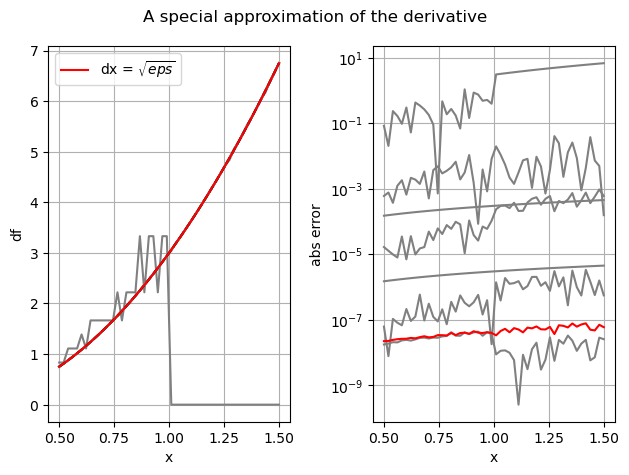

In [8]:
def f(x):
    return x**3
def df(x):
    return 3*x**2

xx = np.linspace(0.5, 1.5)
exact = df(xx)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("A special approximation of the derivative")

for e in range(4, 18, 2):
    dx = 10 ** -e
    approx = (f(xx + dx) - f(xx)) / dx
    
    ax1.plot(xx, approx, "0.5")
    ax2.semilogy(xx, abs(approx-exact), "0.5")

ax1.plot(xx, exact, 'k--')
    
eps = np.finfo(np.double).eps
dx = np.sqrt(eps)

approx = (f(xx + dx) - f(xx)) / dx
    
ax1.plot(xx, approx, "r", label=r"dx = $\sqrt{eps}$")
ax2.semilogy(xx, abs(approx-exact), "r", label=r"dx = $\sqrt{eps}$")

ax1.set_xlabel("x")
ax1.set_ylabel("df")
ax1.grid()
ax1.legend()

ax2.set_xlabel("x")
ax2.set_ylabel("abs error")
ax2.grid()

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import sys

def modified_newton(f, x0, tol=1.0e-10, maxiter=100):
    eps = np.finfo(np.double).eps
    dx = np.sqrt(eps)
    
    x = np.double(x0)
    it = 0
    
    headers = ["iter", "x", "f(x)"]
    data = []
    data.append([it, x, f(x)])
        
    while abs(f(x)) > tol:
        it += 1
        
        df = (f(x + dx) - f(x)) / dx
        x = x - f(x) / df
        data.append([it, x, f(x)])
        
        if it > maxiter:
            sys.stderr.write("WARNING! Modified Newton iteration has not converged. Too many iterations.\n")
            break
        
    df = pd.DataFrame(data, columns=headers)
    return df.style.hide_index()

## Example

Recall the NACA0012 aerofoil example:

In [10]:
def f(x):
    t = 0.1

    yp = -0.1015 * x**4 + 0.2843 * x**3 - 0.3516 * x**2 \
          - 0.126 * x + 0.2969 * np.sqrt(x)
    f = yp - 0.5 * t

    return f

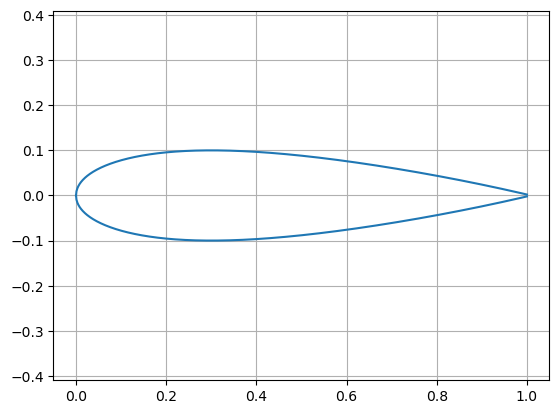

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    t = 0.1

    yp = -0.1015 * np.power(x, 4) \
         + 0.2843 * np.power(x, 3) \
         - 0.3516 * np.power(x, 2) \
         - 0.126 * x \
         + 0.2969 * np.sqrt(x)
    f = yp

    return f

t = np.linspace(0, 1, 1000)
p = plt.plot(t, f(t))
plt.plot(t, -f(t), color=p[0].get_color())
plt.axis('equal')
plt.grid()

plt.show()

In [12]:
def f(x):
    t = 0.1

    yp = -0.1015 * x**4 + 0.2843 * x**3 - 0.3516 * x**2 \
          - 0.126 * x + 0.2969 * np.sqrt(x)
    f = yp - 0.5 * t

    return f

Starting from $x^{(0)} = 1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.765789$ after 2 iterations for the NACA0012 aerofoil example (Same as Newton!):

In [13]:
modified_newton(f, x0=1.0, tol=1.0e-4)

iter,x,f(x)
0,1.000000,-0.047900
1,0.795168,-0.005392
2,0.765789,-0.000096


Starting from $x^{(0)} = 0.1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.033863$ after 5 iterations for the second solution to the NACA0012 aerofoil example (Same as Newton!).

In [14]:
modified_newton(f, x0=0.1, tol=1.0e-4)

iter,x,f(x)
0,0.100000,0.028046
1,0.000278,-0.045086
2,0.005413,-0.028849
3,0.020693,-0.010046
4,0.031958,-0.001300
5,0.033863,-0.000024


# The secant method

In [15]:
def secant(f, x0, x1, tol=1.0e-10):
    # two initial function evaluations
    f0 = f(x0)
    f1 = f(x1)
    
    while abs(f1) > tol:
        # compute derivative approximation
        df = (f1 - f0) / (x1 - x0)
        # update x
        x2 = x1 - f1 / df
        
        # update other variables
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2) # one evaluation of f per iteration
        
    return x1

In [16]:
def secant(f, x0, x1, tol=1.0e-10):
    f0 = f(x0)
    f1 = f(x1)
    
    it = 0
    
    headers = ["iter", "x0", "f(x0)", "x1", "f(x1)"]
    data = []
    data.append([it, x0, f0, x1, f1])
    
    while abs(f1) > tol:
        it = it + 1

        df = (f1 - f0) / (x1 - x0)
        x = x1 - f1 / df
        
        x0, f0 = x1, f1
        x1, f1 = x, f(x) # one evaluation of f per iteration
        
        data.append([it, x0, f0, x1, f1])
        
    df = pd.DataFrame(data, columns=headers)
    return df.style.hide_index()

## Numerical examples

- The naca0012 example starting from 1 and 0.9 to a tolerance of $10^{-4}$ gives the solution as $x^* \approx 0.765264$ after 3 iterations (one more than Newton!)

In [17]:
secant(f, x0=1.0, x1=0.9, tol=1.0e-4)

iter,x0,f(x0),x1,f(x1)
0,1.000000,-0.047900,0.900000,-0.025871
1,0.900000,-0.025871,0.782556,-0.003095
2,0.782556,-0.003095,0.766598,-0.000239
3,0.766598,-0.000239,0.765264,-0.000003


Starting from $x^{(0)} = 0.0$ and $x^{(1)} = 0.1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.033870$ after 5 iterations for the second solution to the NACA0012 aerofoil example (Same as Newton!).

In [18]:
secant(f, x0=0.0, x1=0.1, tol=1.0e-4)

iter,x0,f(x0),x1,f(x1)
0,0.000000,-0.050000,0.100000,0.028046
1,0.100000,0.028046,0.064065,0.015706
2,0.064065,0.015706,0.018327,-0.012232
3,0.018327,-0.012232,0.038352,0.002810
4,0.038352,0.002810,0.034611,0.000465
5,0.034611,0.000465,0.033870,-0.000019


## Turning points?

In [19]:
def f(x):
    return (x-1)**2

secant(f, x0=4.0, x1=3.0, tol=1.0e-4)

iter,x0,f(x0),x1,f(x1)
0,4.000000,9.000000,3.000000,4.000000
1,3.000000,4.000000,2.200000,1.440000
2,2.200000,1.440000,1.750000,0.562500
3,1.750000,0.562500,1.461538,0.213018
4,1.461538,0.213018,1.285714,0.081633
5,1.285714,0.081633,1.176471,0.031142
6,1.176471,0.031142,1.109091,0.011901
7,1.109091,0.011901,1.067416,0.004545
8,1.067416,0.004545,1.041667,0.001736
9,1.041667,0.001736,1.025751,0.000663


## Other problems

Even more care is required to avoid divide by zero errors

In [20]:
def f(x):
    return (x-1)**2

# equal function values at x0 and x1
secant(f, x0=4.0, x1=-2.0, tol=1.0e-4)

ZeroDivisionError: float division by zero

In [21]:
# too small tolerance means x0 = x1!
secant(f, x0=4.0, x1=3.0, tol=1.0e-50) 

ZeroDivisionError: float division by zero

## Exercise (hard!)

Find a periodic iteration for the secant method.

# Summary

|                    | Bisection         | Newton's method            | Modified Newton   | Secant            |
|--------------------|-------------------|----------------------------|-------------------|-------------------|
| Simple algorithm   | yes               | yes                        | yes               | yes               |
| Starting values    | bracket           | one                        | one               | two               |
| Iterations         | lots              | normally fewer             | similar to Newton | similar to Newton |
| Function evals     | one per iteration | `f` and `df` per iteration | two per iteration | one per iteration |
| Convergence        | with good bracket | not always                 | not always        | not always        |
| Turing point roots | no                | slower                     | slower            | slower            |
| Use of derivative  | no                | yes                        | no                | no                |

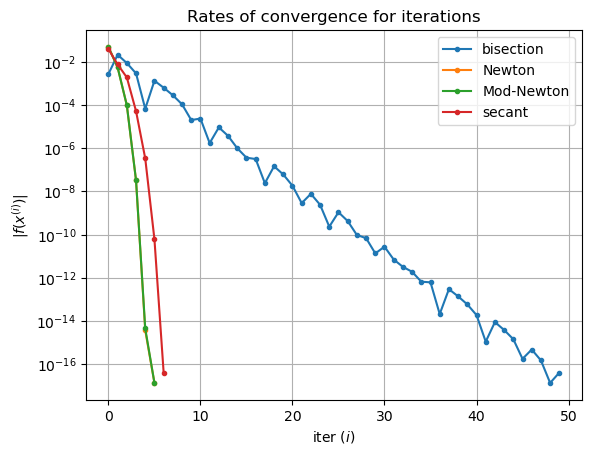

In [22]:
def f(x):
    t = 0.1

    yp = -0.1015 * np.power(x, 4) \
         + 0.2843 * np.power(x, 3) \
         - 0.3516 * np.power(x, 2) \
         - 0.126 * x \
         + 0.2969 * np.sqrt(x)
    f = yp - 0.5 * t

    return f

def df(x):
    dy = -4 * 0.1015 * np.power(x, 3) \
         + 3 * 0.2843 * np.power(x, 2) \
         - 2 * 0.3516 * x \
         - 0.126 \
         + 0.2969 * 0.5 * np.power(x, -0.5)
    f = dy
    
    return f
    
def bisection(func, a, b, tol=1.0e-10):
    # Starting values
    fa = func(a)
    fb = func(b)
    
    feval = [2]
    rets = [(a+b)/2]
    
    while b - a > tol:
        # Find new mid point
        c = (a+b)/2
        fc = func(c)
        
        # if root is in left half of interval
        if fa * fc < 0.0:
            # move right end
            b = c
            fb = fc
        else:
            # otherwise,
            # move the left end
            a = c
            fa = fc
            
        feval.append(feval[-1] + 1)
        rets.append((a+b)/2)
            
    return rets, feval

def newton(f, df, x0, tol=1.0e-10):
    x = x0
    
    feval = [1]
    rets = [x]
        
    while abs(f(x)) > tol:
        x = x - f(x) / df(x)
        rets.append(x)
        feval.append(feval[-1] + 2)
        
    return rets, feval

def modified_newton(f, x0, tol=1.0e-10, maxiter=100):
    eps = np.finfo(np.double).eps
    dx = np.sqrt(eps)
    
    x = x0
    rets = [x]
    feval = [1]
     
    while abs(f(x)) > tol:
        
        df = (f(x + dx) - f(x)) / dx
        x = x - f(x) / df
        
        rets.append(x)
        feval.append(feval[-1] + 2)
    
    return rets, feval
        
def secant(f, x0, x1, tol=1.0e-10):
    # two initial function evaluations
    f0 = f(x0)
    f1 = f(x1)
    
    feval = [2]
    rets = [x1]
    
    while abs(f1) > tol:
        # compute derivative approximation
        df = (f1 - f0) / (x1 - x0)
        # update x
        x2 = x1 - f1 / df
        
        # update other variables
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2) # one evaluation of f per iteration
        
        rets.append(x1)
        feval.append(feval[-1] + 1)
        
    return rets, feval

tol=1.0e-15
bisection_rets, bisection_fevals = bisection(f, 0.5, 1.0, tol=tol)
newton_rets, newton_fevals = newton(f, df, x0=1.0, tol=tol)
modified_rets, modified_fevals = modified_newton(f, x0=1.0, tol=tol)
secant_rets, secant_fevals = secant(f, x0=1.0, x1=0.5, tol=tol)

plt.semilogy([abs(f(x)) for x in bisection_rets], '.-', label='bisection')
plt.semilogy([abs(f(x)) for x in newton_rets], '.-',  label='Newton')
plt.semilogy([abs(f(x)) for x in modified_rets], '.-',  label='Mod-Newton')
plt.semilogy([abs(f(x)) for x in secant_rets], '.-',  label='secant')

plt.title("Rates of convergence for iterations")
plt.xlabel('iter ($i$)')
plt.ylabel('$|f(x^{(i)})|$')
plt.legend()
plt.grid()
plt.show()

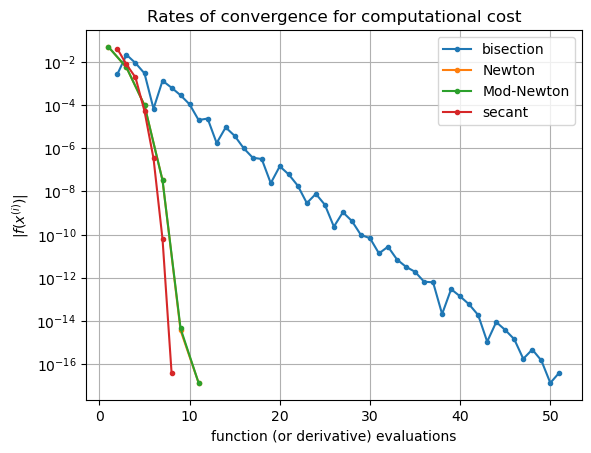

In [23]:
plt.semilogy(bisection_fevals, [abs(f(x)) for x in bisection_rets], '.-', label='bisection')
plt.semilogy(newton_fevals, [abs(f(x)) for x in newton_rets], '.-',  label='Newton')
plt.semilogy(modified_fevals, [abs(f(x)) for x in modified_rets], '.-',  label='Mod-Newton')
plt.semilogy(secant_fevals, [abs(f(x)) for x in secant_rets], '.-',  label='secant')

plt.title("Rates of convergence for computational cost")
plt.xlabel('function (or derivative) evaluations')
plt.ylabel('$|f(x^{(i)})|$')
plt.legend()
plt.grid()
plt.show()